In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

def create_loan_dataset_with_gender_bias(n_samples=1000):
    """
    Creates a synthetic loan approval dataset with intentional gender bias.
    
    The bias: Males get a +20 point boost, Females get a -10 point penalty
    in the scoring system, leading to unfair approval rates.
    """
    
    # Generate base features
    age = np.random.normal(35, 10, n_samples)
    age = np.clip(age, 18, 80)  # Keep ages realistic
    
    income = np.random.normal(50000, 15000, n_samples)
    income = np.clip(income, 15000, 150000)  # Keep income realistic
    
    credit_score = np.random.normal(650, 70, n_samples)
    credit_score = np.clip(credit_score, 300, 850)  # Standard credit score range
    
    # Protected attribute: Gender
    gender = np.random.choice(['Male', 'Female'], n_samples, p=[0.52, 0.48])
    
    # Calculate base approval score (fair calculation)
    base_score = (0.3 * age + 
                  0.4 * (income / 1000) + 
                  0.3 * credit_score)
    
    # INJECT BIAS: Add unfair gender-based adjustment
    gender_bias = np.where(gender == 'Male', 20, -10)
    biased_score = base_score + gender_bias
    
    # Convert to binary approval (1 = approved, 0 = rejected)
    approval_threshold = np.median(biased_score)
    approved = (biased_score > approval_threshold).astype(int)
    
    # Create DataFrame
    df = pd.DataFrame({
        'age': age.round(0),
        'income': income.round(0),
        'credit_score': credit_score.round(0),
        'gender': gender,
        'approved': approved
    })
    
    return df

# Generate the dataset
print("Creating biased loan dataset...")
loan_data = create_loan_dataset_with_gender_bias(1000)

# Display basic info
print(f"Dataset shape: {loan_data.shape}")
print("\nFirst 5 rows:")
print(loan_data.head())

print("\nDataset summary:")
print(loan_data.describe())


Creating biased loan dataset...
Dataset shape: (1000, 5)

First 5 rows:
    age   income  credit_score  gender  approved
0  40.0  70990.0         603.0  Female         0
1  34.0  63870.0         640.0  Female         0
2  41.0  50894.0         595.0    Male         0
3  50.0  40296.0         628.0  Female         0
4  33.0  60473.0         517.0    Male         0

Dataset summary:
               age        income  credit_score    approved
count  1000.000000   1000.000000   1000.000000  1000.00000
mean     35.328000  51124.703000    650.301000     0.50000
std       9.542089  14796.391908     68.470261     0.50025
min      18.000000  15000.000000    439.000000     0.00000
25%      28.750000  40906.250000    605.000000     0.00000
50%      35.000000  50946.000000    650.000000     0.50000
75%      41.000000  60933.000000    696.250000     1.00000
max      74.000000  97897.000000    850.000000     1.00000


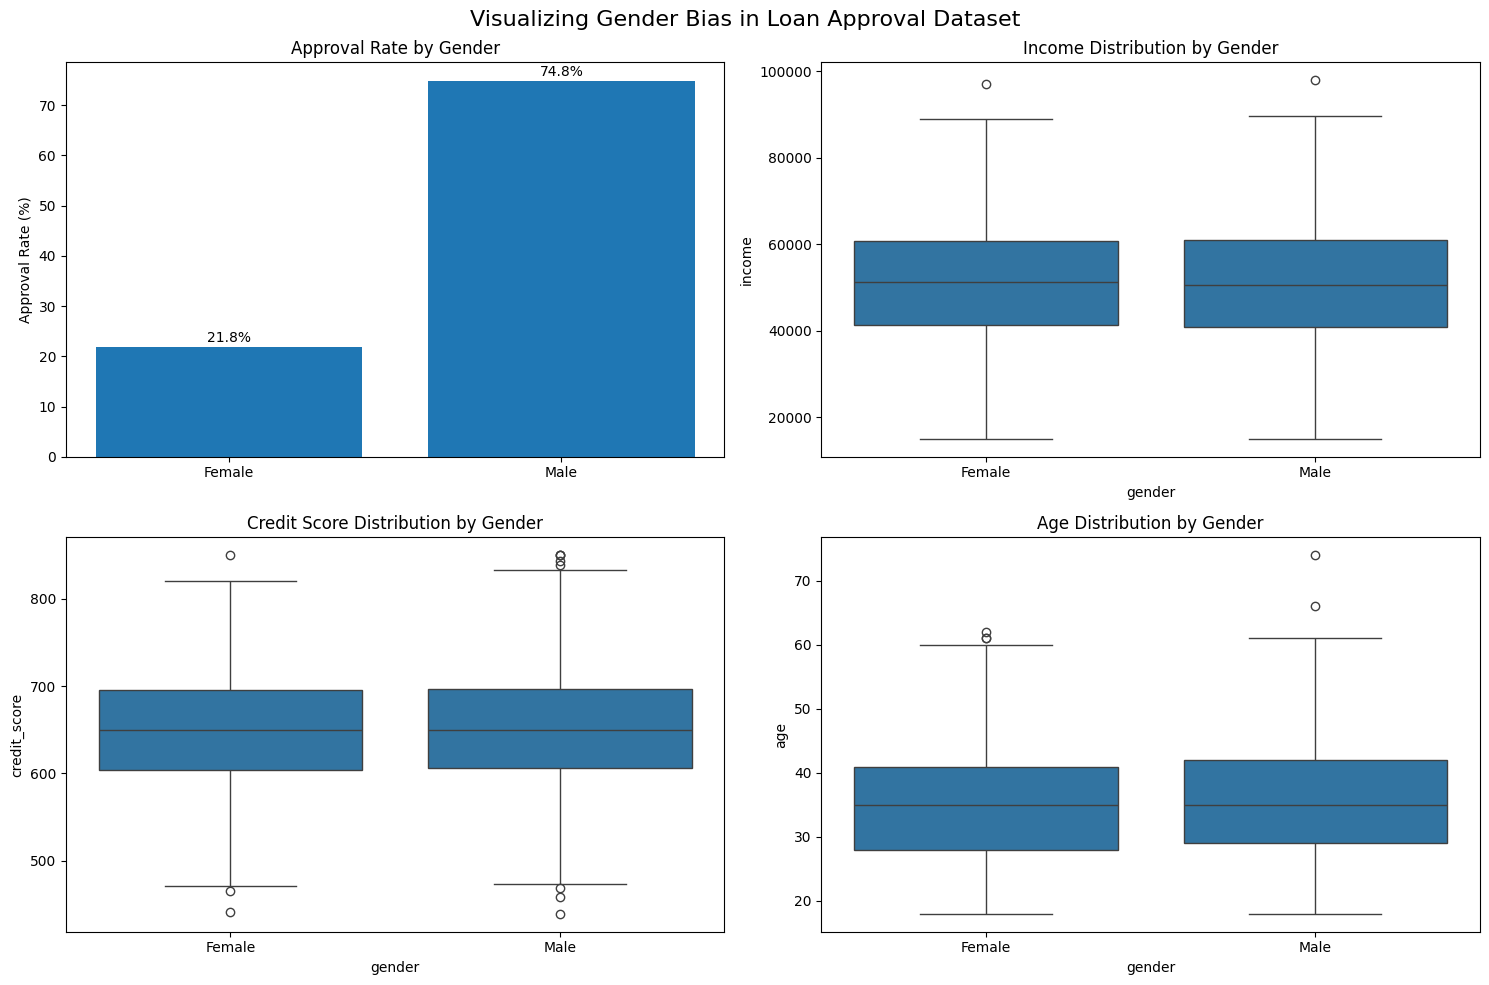

BIAS ANALYSIS:
Male approval rate: 74.81%
Female approval rate: 21.79%
Bias gap: 53.02 percentage points


In [2]:
# Let's visualize the bias we've created
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Visualizing Gender Bias in Loan Approval Dataset', fontsize=16)

# 1. Approval rates by gender
approval_by_gender = loan_data.groupby('gender')['approved'].agg(['count', 'sum', 'mean'])
approval_by_gender['approval_rate'] = approval_by_gender['mean'] * 100

axes[0,0].bar(approval_by_gender.index, approval_by_gender['approval_rate'])
axes[0,0].set_title('Approval Rate by Gender')
axes[0,0].set_ylabel('Approval Rate (%)')
for i, v in enumerate(approval_by_gender['approval_rate']):
    axes[0,0].text(i, v + 1, f'{v:.1f}%', ha='center')

# 2. Income distribution by gender
sns.boxplot(data=loan_data, x='gender', y='income', ax=axes[0,1])
axes[0,1].set_title('Income Distribution by Gender')

# 3. Credit score distribution by gender  
sns.boxplot(data=loan_data, x='gender', y='credit_score', ax=axes[1,0])
axes[1,0].set_title('Credit Score Distribution by Gender')

# 4. Age distribution by gender
sns.boxplot(data=loan_data, x='gender', y='age', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Gender')

plt.tight_layout()
plt.show()

# Print the exact bias we injected
print("BIAS ANALYSIS:")
print(f"Male approval rate: {approval_by_gender.loc['Male', 'approval_rate']:.2f}%")
print(f"Female approval rate: {approval_by_gender.loc['Female', 'approval_rate']:.2f}%")
print(f"Bias gap: {approval_by_gender.loc['Male', 'approval_rate'] - approval_by_gender.loc['Female', 'approval_rate']:.2f} percentage points")


In [3]:
# Save the dataset for later use
loan_data.to_csv('../data/loan_dataset_with_gender_bias.csv', index=False)
print("Dataset saved to data/loan_dataset_with_gender_bias.csv")

# Also create a summary of the bias for reference
bias_summary = f"""
# Loan Dataset Bias Summary

Dataset created on: {pd.Timestamp.now()}
Total samples: {len(loan_data)}

## Injected Bias:
- Males receive +20 point boost in approval scoring
- Females receive -10 point penalty in approval scoring

## Resulting Approval Rates:
- Male approval rate: {approval_by_gender.loc['Male', 'approval_rate']:.2f}%
- Female approval rate: {approval_by_gender.loc['Female', 'approval_rate']:.2f}%
- Bias gap: {approval_by_gender.loc['Male', 'approval_rate'] - approval_by_gender.loc['Female', 'approval_rate']:.2f} percentage points

This bias violates the "80% rule" if the ratio falls below 0.8.
"""

with open('../reports/bias_summary.md', 'w') as f:
    f.write(bias_summary)
    
print("Bias summary saved to reports/bias_summary.md")


Dataset saved to data/loan_dataset_with_gender_bias.csv
Bias summary saved to reports/bias_summary.md
